In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.simplefilter("ignore")

In [3]:
columns_name = ['user_id','item_id','rating','time_stamp']
df = pd.read_csv('u.data', sep='\t', names=columns_name)
df.head()

,user_id,item_id,rating,time_stamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movies = pd.read_csv('u.item', header=None)
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,Unnamed: 3,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0.1,0.2,1.1,1.2,...,0.6,0.7,0.8,0.9,0.1,0.11,0.12,0.13,0.14,0.15
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.00,0.00,0.00
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.00,0.00,0.00
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.00,0.00,0.00


In [5]:
movies = movies[[0,1]]

In [6]:
movies.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
movies.columns = ['item_id', 'movie_name']
movies.head()

,item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
movies.movie_name.nunique()

1664

In [9]:
movies.shape

(1682, 2)

In [10]:
df = pd.merge(df,movies,on='item_id')

In [11]:
df.shape

(100000, 5)

In [12]:
df.head()

,user_id,item_id,rating,time_stamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [13]:
df.item_id.nunique()

1682

In [14]:
len(df.movie_name.unique())

1664

## EDA

In [21]:
df.groupby('movie_name').mean()['rating'].sort_values(ascending = False)

movie_name
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [27]:
df.groupby('movie_name').count()['rating'].sort_values(ascending = False)

movie_name
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [28]:
rating = pd.DataFrame(df.groupby('movie_name').mean()['rating'])
rating.head()

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [29]:
rating['no_of_rating'] = pd.DataFrame(df.groupby('movie_name').count()['rating'])

In [30]:
rating.head()

,rating,no_of_rating
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

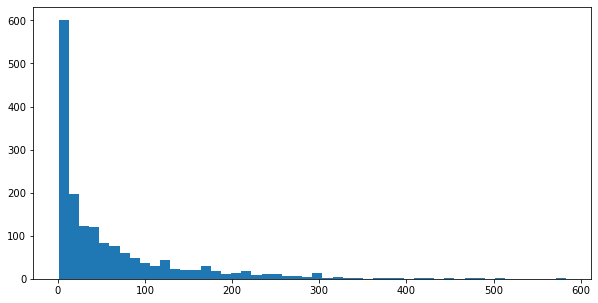

In [41]:
plt.figure(figsize=(10,5))
plt.hist(x = rating['no_of_rating'], bins=50)
plt.show()

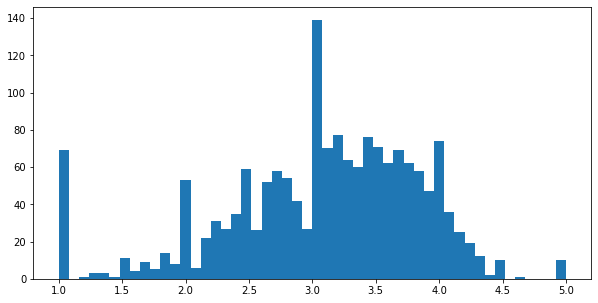

In [42]:
plt.figure(figsize=(10,5))
plt.hist(x = rating['rating'], bins=50)
plt.show()

<Figure size 720x720 with 0 Axes>

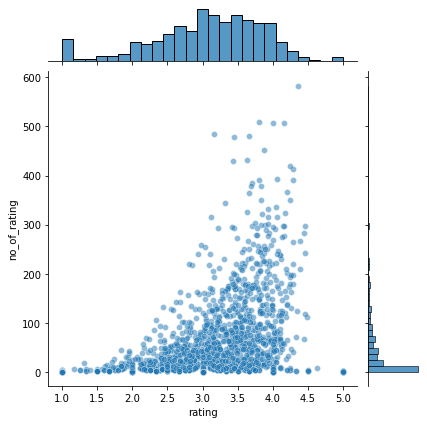

In [45]:
plt.figure(figsize=(10,10))
sns.jointplot(x=rating['rating'], y=rating['no_of_rating'], data=rating, alpha = 0.5)
plt.show()

## Creating Movie Recommendation

In [46]:
df.head()

,user_id,item_id,rating,time_stamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [48]:
moviemat = df.pivot_table(index='user_id', columns='movie_name', values = 'rating')

In [50]:
moviemat.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [51]:
rating.sort_values('no_of_rating', ascending=False).head()

,rating,no_of_rating
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [53]:
starwar_user_rating = moviemat['Star Wars (1977)']

In [54]:
starwar_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [56]:
similar_to_starwar = moviemat.corrwith(starwar_user_rating)

In [57]:
similar_to_starwar

movie_name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [59]:
corr_of_starwars = pd.DataFrame(similar_to_starwar, columns=['Correlation'])

In [60]:
corr_of_starwars.dropna(inplace=True)

In [62]:
corr_of_starwars.head()

,Correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [65]:
corr_of_starwars.sort_values('Correlation', ascending=False).head()

,Correlation
movie_name,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [66]:
# only recommend those movies user rating is above 100
corr_of_starwars = corr_of_starwars.join(rating['no_of_rating'])

In [67]:
corr_of_starwars.head()

,Correlation,no_of_rating
movie_name,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [70]:
corr_of_starwars[corr_of_starwars['no_of_rating']>100].sort_values('Correlation', ascending=False)

,Correlation,no_of_rating
movie_name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## Predict Function

In [72]:
def predict_movie(movie_name):
    movie_user_rating = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_rating)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(rating['no_of_rating'])
    prediction = corr_movie[corr_movie['no_of_rating']>100].sort_values('Correlation', ascending=False)
    return prediction

In [73]:
predict_movie('Return of the Jedi (1983)')

,Correlation,no_of_rating
movie_name,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,367
Star Wars (1977),0.672556,583
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
...,...,...
Brazil (1985),-0.111670,208
Lost Highway (1997),-0.112456,125
Annie Hall (1977),-0.116004,180


In [74]:
predict_movie('Titanic (1997)')

,Correlation,no_of_rating
movie_name,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
...,...,...
Raging Bull (1980),-0.223660,116
Jackie Brown (1997),-0.236841,126
Brazil (1985),-0.243532,208
